In [2]:
# 加载第三方库
import numpy as np
import pandas as pd
import textwrap

from pyBibX.base import pbx_probe
from prettytable import PrettyTable

ImportError: Numba needs NumPy 1.25 or less

关于导入后报错：

    ImportError: Numba needs NumPy 1.25 or less

In [4]:
# 需要将numpy版本指定到1.25版本或者更低
!pip install numpy==1.25

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/

## 重新启动后再次运行下面代码

（1）第三方库导入

In [1]:
import numpy as np
import pandas as pd
import textwrap

from pyBibX.base import pbx_probe
from prettytable import PrettyTable

（2）加载数据bib文件

In [2]:
# 参数奢姿: file_bib = 'filename.bib'; db = 'scopus', 'wos', 'pubmed'; del_duplicated = True, False

file_name = '../assets/bibs/scopus.bib'
database  = 'scopus'
bibfile   = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)

A Total of 261 Documents were Found ( 263 Documents and 2 Duplicates )

Article = 179
Article in Press = 1
Book Chapter = 12
Conference Paper = 64
Conference Review = 3
Review = 2


（3）探索式数据分析EDA

In [3]:
report  = bibfile.eda_bib()
report

Main Information    Results
0                                Timespan  1998-2022
1               Total Number of Countries         34
2            Total Number of Institutions        313
3                 Total Number of Sources        156
4              Total Number of References       8536
5               Total Number of Languages          6
6                  --croatian (# of docs)          1
7                   --english (# of docs)        252
8       --english; lithuanian (# of docs)          1
9                    --french (# of docs)          2
10                   --polish (# of docs)          1
11               --portuguese (# of docs)          4
12                                   -//-       -//-
13              Total Number of Documents        261
14                              --Article        179
15                     --Article in Press          1
16                         --Book Chapter         12
17                     --Conference Paper         64
18                    --Conference Review          3
19                               --Review          2
20           Average Documents per Author        1.6
21      Average Documents per Institution       2.61
22           Average Documents per Source       1.67
23             Average Documents per Year      10.44
24                                   -//-       -//-
25                Total Number of Authors        499
26       Total Number of Authors Keywords        687
27  Total Number of Authors Keywords Plus       1359
28        Total Single-Authored Documents         14
29         Total Multi-Authored Documents        247
30            Average Collaboration Index       3.06
31                            Max H-Index         14
32                                   -//-       -//-
33              Total Number of Citations       5863
34           Average Citations per Author      11.75
35      Average Citations per Institution      18.73
36         Average Citations per Document      22.46
37           Average Citations per Source      37.57
38                                   -//-       -//-

（4）检查文章的IDs

In [4]:
#需要借助google.colab下的data_table进行展示
#那么就要下载安装google-colab这个模块，和pybibx安装一样，也需要借助conda

安装指令：

        conda install -c conda-forge google-colab

In [5]:
# 安装成功了，但是导入时候，发现报错

In [6]:
from google.colab import data_table

ModuleNotFoundError: No module named 'termios'

In [7]:
# 出现：ModuleNotFoundError: No module named 'termios'报错
# 这时候就需要再unix系统上运行
# Because it requires the termios module, it will work only on Unix.

那么就跳过这个可视化展示，使用其它的第三方库进行美化展示

In [3]:
bibfile.table_id_doc

ID                                           Document
0      0  Figueira, J.R. and Greco, S. and Roy, B. (2022...
1      1  de Araújo, M.C.B. and Alencar, L.H. and de Mir...
2      2  Viana, F.F.C.L. and Alencar, M.H. and Ferreira...
3      3  Ahmed, U. and Carpitella, S. and Certa, A. (20...
4      4  Rocha, A. and Costa, A.S. and Figueira, J.R. a...
..   ...                                                ...
256  256  Mousseau, V. and Slowinski, R. and Zielniewicz...
257  257  Dias, L.C. and Clímaco, J.N. (2000). ELECTRE T...
258  258  Raju, K.S. and Duckstein, L. and Arondel, C. (...
259  259  Dias, L.C. and Clímaco, J.N. (1999). On comput...
260  260  Mousseau, V. and Slowinski, R. (1998). Inferri...

[261 rows x 2 columns]

In [4]:
from pandasgui import show
show(bibfile.table_id_doc)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


<img src='gui.png'>

(5) 检查每种文献类型包含的IDs

In [5]:
bibfile.id_doc_types()

Document Types                                                IDs
0            Article  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
1   Article in Press                                               [92]
2       Book Chapter  [58, 84, 108, 129, 130, 131, 132, 133, 134, 16...
3   Conference Paper  [14, 18, 19, 22, 33, 36, 38, 42, 44, 60, 61, 6...
4  Conference Review                                     [81, 100, 206]
5             Review                                         [142, 174]

In [6]:
show(bibfile.id_doc_types())

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


<img src='IDs.png'>

(6)检查作者与IDs

In [7]:
bibfile.table_id_aut

ID            Author
0      a_0          abed, m.
1      a_1      abi-zeid, i.
2      a_2         achki, s.
3      a_3       addi, a.-m.
4      a_4       adolphe, l.
..     ...               ...
494  a_494    zopounidis, c.
495  a_495    özpeynirci, o.
496  a_496  özpeynirci, s.b.
497  a_497        öztürk, m.
498  a_498         şahin, m.

[499 rows x 2 columns]

In [8]:
bibfile.table_id_aut.groupby('Author').count().reset_index()
#全都是唯一作者

Author  ID
0            abed, m.   1
1        abi-zeid, i.   1
2           achki, s.   1
3         addi, a.-m.   1
4         adolphe, l.   1
..                ...  ..
494    zopounidis, c.   1
495    özpeynirci, o.   1
496  özpeynirci, s.b.   1
497        öztürk, m.   1
498         şahin, m.   1

[499 rows x 2 columns]

（7）检查文献来源与IDs

In [9]:
bibfile.table_id_jou

ID                                       Source
0      j_0                               eur j oper res
1      j_1                                        omega
2      j_2                     lect. notes comput. sci.
3      j_3  journal of multi-criteria decision analysis
4      j_4                       int. trans. oper. res.
..     ...                                          ...
151  j_151                           appl. math. model.
152  j_152                            adv. soft comput.
153  j_153               adv. sci., technol. eng. syst.
154  j_154                               adv. eng. inf.
155  j_155                                          4or

[156 rows x 2 columns]

In [10]:
bibfile.table_id_jou.groupby('Source').count().reset_index()
#全都是唯一期刊，类似数据库中的表格，没有重复

Source  ID
0                                                  4or   1
1                                       adv. eng. inf.   1
2                            adv. intell. soft comput.   1
3                            adv. intell. sys. comput.   1
4    adv. saf., reliab. risk manage. - proc. eur. s...   1
..                                                 ...  ..
151                          univers. access inf. soc.   1
152                                      waste manage.   1
153                                              water   1
154                              water resour. manage.   1
155                                water sci. technol.   1

[156 rows x 2 columns]

（8）检查机构和IDs

In [11]:
bibfile.table_id_uni

ID                                        Institution
0      i_0    institute for systems engineering and computers
1      i_1                              university of coimbra
2      i_2                    polytechnic institute of leiria
3      i_3                  industrial engineering laboratory
4      i_4                       university of brasília - unb
..     ...                                                ...
308  i_308                  department of operations research
309  i_309  leesu (laboratoire eau environnement et systèm...
310  i_310                       centre d’études de cadarache
311  i_311               gradevinski fak. sveucilista zagrebu
312  i_312                                   amity university

[313 rows x 2 columns]

（9）检查国家和IDs

In [12]:
bibfile.table_id_ctr

ID         Country
0    c_0            Iran
1    c_1         Finland
2    c_2         Lebanon
3    c_3          Serbia
4    c_4          Turkey
5    c_5           India
6    c_6         Belgium
7    c_7        Cameroon
8    c_8         Czechia
9    c_9         Tunisia
10  c_10           Chile
11  c_11     Netherlands
12  c_12    Burkina Faso
13  c_13  United Kingdom
14  c_14         Austria
15  c_15    Saudi Arabia
16  c_16          Mexico
17  c_17         Croatia
18  c_18          Canada
19  c_19           China
20  c_20          France
21  c_21          Poland
22  c_22         Germany
23  c_23         Morocco
24  c_24          Brazil
25  c_25        Portugal
26  c_26           Spain
27  c_27        Slovenia
28  c_28           Italy
29  c_29          Greece
30  c_30         Algeria
31  c_31          UNKNOW
32  c_32         Denmark
33  c_33     Switzerland

（10）检查作者关键词与IDs


In [13]:
bibfile.table_id_kwa

ID                                         KWA
0      k_0                                 electre tri
1      k_1                  multiple criteria analysis
2      k_2                                     sorting
3      k_3                               electre tri-c
4      k_4                               multicriteria
..     ...                                         ...
682  k_682      aggregation/ disaggregation approaches
683  k_683                           activity branches
684  k_684  accreditation of qualifications and skills
685  k_685                      accounting information
686  k_686                                       68n99

[687 rows x 2 columns]

（11）关键词Plus与IDs

In [14]:
bibfile.table_id_kwp

ID                       KWP
0        p_0           decision making
1        p_1               electre tri
2        p_2  decision support systems
3        p_3                   electre
4        p_4    multicriteria analysis
...      ...                       ...
1354  p_1354       accuracy assessment
1355  p_1355             accreditation
1356  p_1356                  accident
1357  p_1357      absolute performance
1358  p_1358            abandoned mine

[1359 rows x 2 columns]

## 2 数据可视化

（1）词云图

`bibfile.word_cloud_plot()`可以从摘要、标题、作者关键词和关键词Plus四个字段进行绘制词云图

对应的是entry参数，可以指定的赋值为`'abs', 'title', 'kwa', or 'kwp'`

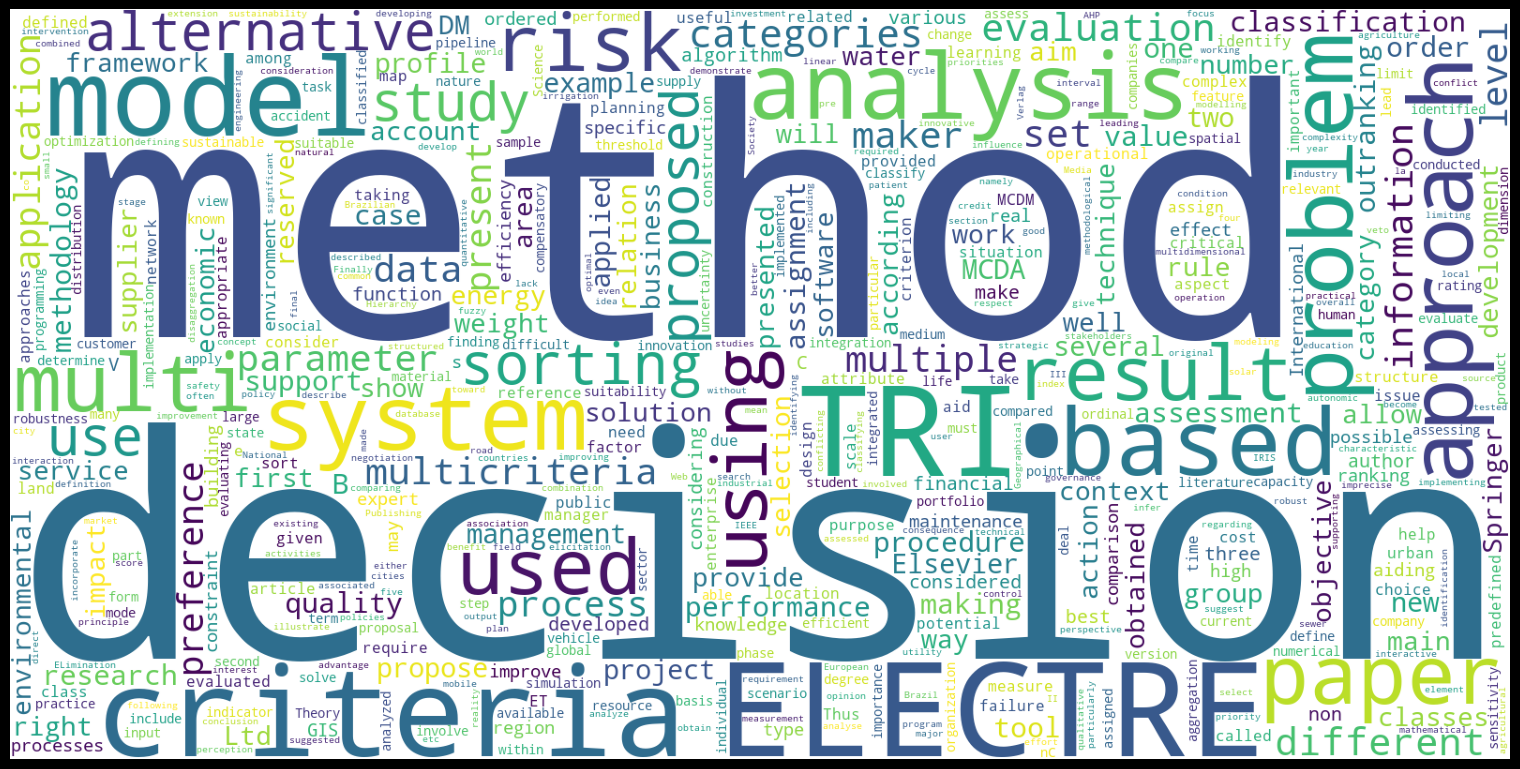

In [15]:
bibfile.word_cloud_plot(entry = 'abs', size_x = 15, size_y = 10, wordsn = 500)

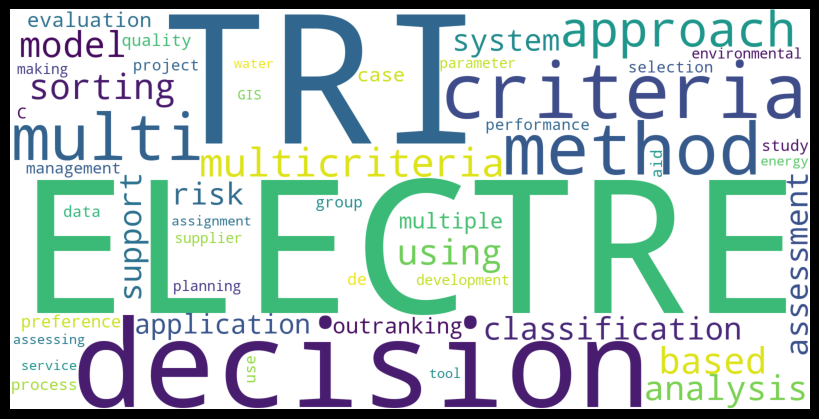

In [16]:
bibfile.word_cloud_plot(entry = 'title', size_x = 8, size_y = 6, wordsn = 50)

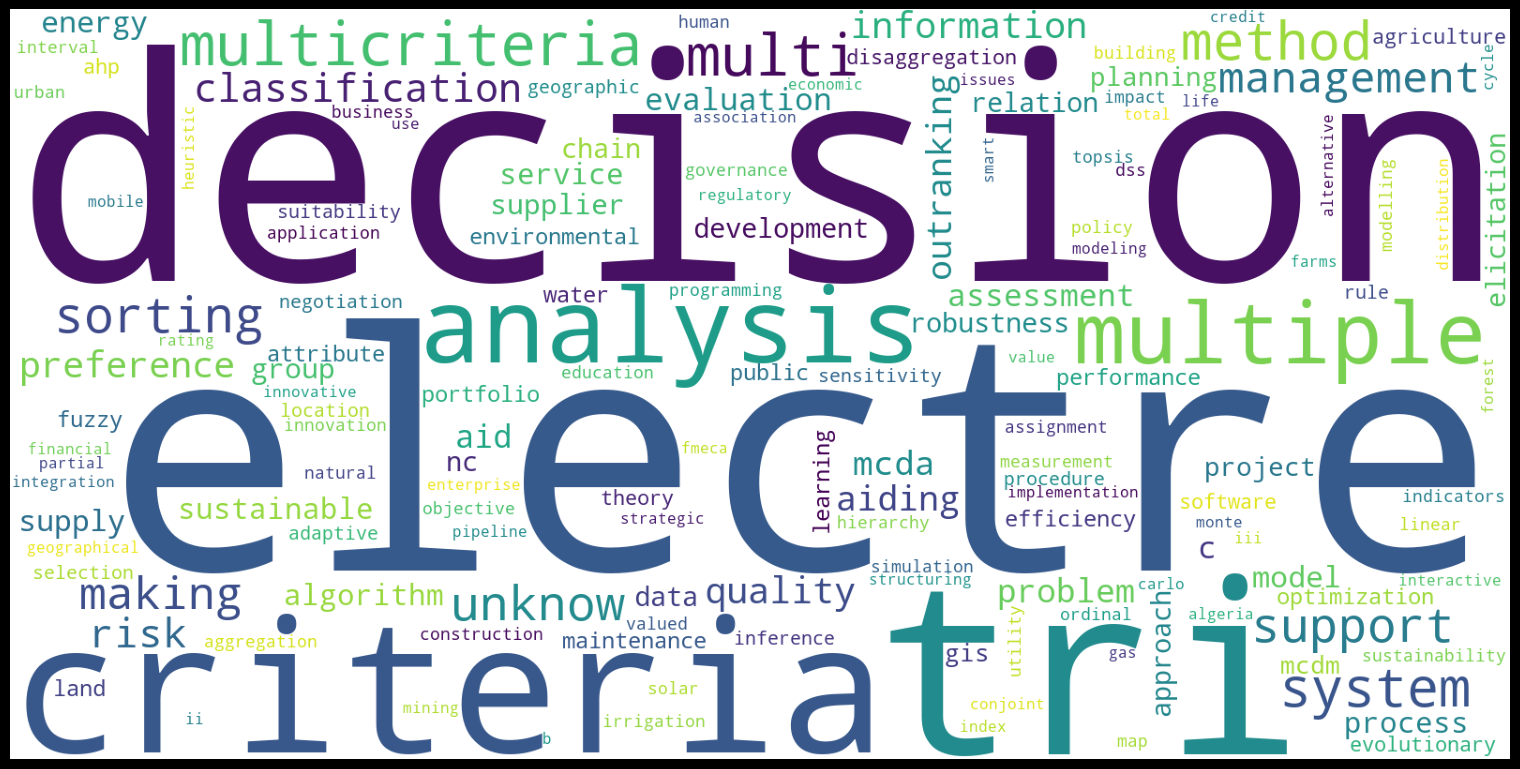

In [19]:
bibfile.word_cloud_plot(entry = 'kwa', size_x = 15, size_y = 10, wordsn = 150)

（2）词频表格

In [20]:
table             = PrettyTable()
data_wd           = bibfile.ask_gpt_wd
table.field_names = ['Word', 'Importance']
for key, value in data_wd.items():
    table.add_row([key, round(value, 4)])
print(table)

+----------------+------------+
|      Word      | Importance |
+----------------+------------+
|    electre     |    1.0     |
|    decision    |   0.9295   |
|      tri       |   0.9038   |
|    criteria    |   0.6346   |
|    analysis    |   0.5641   |
|    multiple    |   0.3654   |
| multicriteria  |   0.3526   |
|     multi      |   0.3333   |
|     system     |   0.2821   |
|     method     |   0.2692   |
|    sorting     |   0.2372   |
|     unknow     |   0.2179   |
|    support     |   0.2179   |
|     making     |   0.1923   |
|   management   |   0.1795   |
|      risk      |   0.1538   |
| classification |   0.1474   |
|    quality     |   0.1282   |
|   preference   |   0.1282   |
|  information   |   0.1282   |
|     aiding     |   0.1154   |
|   outranking   |   0.1154   |
|      mcda      |   0.109    |
|    problem     |   0.1026   |
|      aid       |   0.0962   |
|   evaluation   |   0.0897   |
|   assessment   |   0.0897   |
|       c        |   0.0897   |
|     mo

In [21]:
bibfile.ask_gpt_wd

{'electre': 1.0,
 'decision': 0.9294871794871795,
 'tri': 0.9038461538461539,
 'criteria': 0.6346153846153846,
 'analysis': 0.5641025641025641,
 'multiple': 0.36538461538461536,
 'multicriteria': 0.3525641025641026,
 'multi': 0.3333333333333333,
 'system': 0.28205128205128205,
 'method': 0.2692307692307692,
 'sorting': 0.23717948717948717,
 'unknow': 0.21794871794871795,
 'support': 0.21794871794871795,
 'making': 0.19230769230769232,
 'management': 0.1794871794871795,
 'risk': 0.15384615384615385,
 'classification': 0.14743589743589744,
 'quality': 0.1282051282051282,
 'preference': 0.1282051282051282,
 'information': 0.1282051282051282,
 'aiding': 0.11538461538461539,
 'outranking': 0.11538461538461539,
 'mcda': 0.10897435897435898,
 'problem': 0.10256410256410256,
 'aid': 0.09615384615384616,
 'evaluation': 0.08974358974358974,
 'assessment': 0.08974358974358974,
 'c': 0.08974358974358974,
 'model': 0.08333333333333333,
 'supply': 0.08333333333333333,
 'energy': 0.08333333333333333,

In [24]:
from pyecharts import options as opts
from pyecharts.charts import WordCloud
from pyecharts.globals import SymbolType


words = [(k,v) for k,v in bibfile.ask_gpt_wd.items()]
c = (
    WordCloud()
    .add("", words, word_size_range=[20, 100], shape=SymbolType.DIAMOND)
    .set_global_opts(title_opts=opts.TitleOpts(title="WordCloud-shape-diamond"))
   
)
c.render_notebook()

In [26]:
from pyecharts import options as opts
from pyecharts.charts import WordCloud
from pyecharts.globals import SymbolType


words = [(k,v) for k,v in bibfile.ask_gpt_wd.items()]
c = (
    WordCloud()
    .add("", words, word_size_range=[20, 100], shape=SymbolType.DIAMOND)
    .set_global_opts(title_opts=opts.TitleOpts(title="WordCloud-shape-diamond"))
   
)
c.render('pyecharts_wordcloud.pdf')

'D:\\Miniconda项目\\课题\\科学计量\\pybibx\\[2] Scopus\\pyecharts_wordcloud.pdf'

（3）N-Grams

In [27]:
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry      = 'abs', 'title', 'kwa', or 'kwp'
#            n_grams    = An integer with size n (representing the most common groups of words with size n)
#            stop_words = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                         'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                         'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                         'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus
#             wordsn           = Number of N-Grams
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwp', ngrams = 3, stop_words = [], rmv_custom_words = [], wordsn = 15)

In [30]:
bibfile.ask_gpt_ng

Word  Freq
0           decision support systems    60
1            multi criteria decision    48
2           decision making decision    24
3         multiple criteria decision    20
4         criteria decision analysis    19
5            making decision support    18
6            multi criteria analysis    16
7           criteria decision aiding    16
8     geographic information systems    16
9           criteria decision making    15
10        multiple criteria analysis    11
11     classification of information    11
12           decision support system    11
13        criteria multiple criteria    10
14  artificial intelligence decision    10

In [32]:
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwp', ngrams = 3, stop_words = [], rmv_custom_words = [], wordsn = 20)

In [33]:
bibfile.ask_gpt_ng

Word  Freq
0           decision support systems    60
1            multi criteria decision    48
2           decision making decision    24
3         multiple criteria decision    20
4         criteria decision analysis    19
5            making decision support    18
6            multi criteria analysis    16
7           criteria decision aiding    16
8     geographic information systems    16
9           criteria decision making    15
10        multiple criteria analysis    11
11     classification of information    11
12           decision support system    11
13        criteria multiple criteria    10
14  artificial intelligence decision    10
15                 electre tri multi    10
16          support systems decision     9
17                tri multi criteria     9
18            criteria decision aids     9
19         decision supports electre     8

(4)文献聚类

In [52]:
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            custom_label      = A list of custom labels for each document. The user can define each document cluster;
#            custom_projection = A list of custom coordinates for each document. The user can define each document coordinate;
#            n_components      = Number of Dimensions;
#            n_clusters        = Number of Clusters;
#            tf_idf            = True or False (True -> The Cluster Algorithm will use the DTM to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            embeddings        = True or False (True -> The Cluster Algorithm will use the Word Embeddings to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            method            = 'tsvd' or 'umap' ('tsvd' -> Truncated SVD projection method is used. 'umap' -> UMAP projection method is used)
projection, labels = bibfile.docs_projection(view              = 'notebook',
                                             corpus_type       = 'abs',
                                             stop_words        = ['en'],
                                             rmv_custom_words  = [],
                                             custom_label      = [],
                                             custom_projection = [],
                                             n_components      = 2,
                                             n_clusters        = 5,
                                             tf_idf            = False,
                                             embeddings        = False,
                                             method            = 'umap')

In [53]:
data_pr = pd.DataFrame(np.hstack([projection, labels.reshape(-1,1)]))
data_pr 

0          1    2
0    3.844940  14.215761  1.0
1    0.673165  11.180167  0.0
2    0.210069  10.085811  0.0
3    1.273995   9.118046  3.0
4    2.608781  10.479581  3.0
..        ...        ...  ...
256  3.261425  13.285435  1.0
257  2.198348  13.768296  1.0
258  1.920452   9.256334  3.0
259  2.235568  13.829961  1.0
260  2.777856  14.346270  1.0

[261 rows x 3 columns]

(5) 检查文献聚类

In [54]:
cluster      = 0
idx_articles = [i for i in range(0, labels.shape[0]) if labels[i] == cluster]
print(*idx_articles, sep = ', ')

1, 2, 7, 16, 17, 21, 33, 36, 37, 43, 45, 49, 57, 65, 66, 68, 69, 72, 74, 77, 79, 89, 92, 94, 96, 102, 103, 112, 113, 114, 115, 123, 128, 130, 150, 175, 177, 180, 196, 205, 209, 215, 216, 239, 244, 251, 253


## 主题词演化

In [55]:
bibfile.plot_evolution_year(view             = 'browser',
                            stop_words       = ['en'],
                            rmv_custom_words = [],
                            key              = 'abs',
                            topn             = 10,
                            start            = 2010,
                            end              = 2021)

In [37]:
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            key               = 'abs', 'title', 'jou, 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            topn              = Total number entities;
#            start             = Start Year; -1 = all years
#            end               = End Year;   -1 = all years
bibfile.plot_evolution_year(view             = 'notebook',
                            stop_words       = ['en'],
                            rmv_custom_words = [],
                            key              = 'abs',
                            topn             = 10,
                            start            = 2010,
                            end              = 2021)

In [56]:
data_ep = bibfile.ask_gpt_ep
print(textwrap.fill(data_ep, 150))

 2010: tri (9), electre (9), decision (8), method (8), paper (5), based (5), application (4), process (4), proposed (4), presented (4) 2011: method
(8), tri (8), electre (8), decision (6), criteria (6), model (6), categories (6), results (4), multicriteria (4), predefined (4) 2012: tri (15),
electre (15), decision (13), method (12), criteria (11), based (9), paper (8), sorting (8), multiple (8), problems (8) 2013: tri (13), electre (13),
method (11), decision (10), criteria (7), paper (7), analysis (6), real (6), based (5), approach (5) 2014: tri (21), electre (21), method (19),
criteria (18), decision (15), analysis (15), paper (14), model (12), information (12), study (11) 2015: tri (17), electre (17), criteria (14),
decision (13), method (13), analysis (10), multi (9), based (8), information (8), results (7) 2016: criteria (16), decision (15), tri (15), electre
(15), method (13), problem (11), multi (11), analysis (9), paper (9), approach (8) 2017: electre (16), tri (16), method (14

## 桑基图绘制

In [58]:
bibfile.sankey_diagram(view = 'browser', entry = ['aut', 'cout', 'inst', 'lan'], topn = 10)

In [39]:
# Sankey Diagram (An interactive plot)
# Arguments: view  = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry = a list of any length of the following keys -> 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan';
#            topn  = Total number entities
bibfile.sankey_diagram(view = 'notebook', entry = ['aut', 'cout', 'inst', 'lan'], topn = 10)

# PS: The white bars can be dragged

In [59]:
data_sk = bibfile.ask_gpt_sk
data_sk

Node From                           Node To  \
0                       mousseau, v.                            France   
1                         dias, l.c.                          Portugal   
2                     figueira, j.r.                          Portugal   
3                      antunes, c.h.                          Portugal   
4                        costa, h.g.                            Brazil   
5                   de almeida, a.t.                            Brazil   
6                       oliveira, e.                          Portugal   
7                         trojan, f.                            Brazil   
8                             unknow                  UNKNOW_Countries   
9                      kadziński, m.                            Poland   
10                          Portugal                           ceg-ist   
11                            Poland    institute of computing science   
12                            Brazil  federal university of pernambuco   
13                            France      laboratoire génie industriel   
14                          Portugal              faculty of economics   
15                  UNKNOW_Countries               UNKNOW_Institutions   
16                          Portugal   polytechnic institute of leiria   
17                            Brazil   universidade federal fluminense   
18                            France           psl research university   
19                          Portugal        instituto superior técnico   
20                           ceg-ist                           english   
21              faculty of economics                           english   
22    institute of computing science                           english   
23      laboratoire génie industriel                           english   
24  federal university of pernambuco                           english   
25               UNKNOW_Institutions                           english   
26        instituto superior técnico                           english   
27   polytechnic institute of leiria                           english   
28   universidade federal fluminense                           english   
29           psl research university                           english   

    Connection Weigth  
0                  18  
1                  17  
2                  11  
3                  10  
4                   9  
5                   8  
6                   6  
7                   6  
8                   6  
9                   5  
10                 14  
11                  9  
12                  8  
13                  7  
14                  6  
15                  6  
16                  5  
17                  5  
18                  4  
19                  3  
20                 17  
21                 13  
22                  9  
23                  8  
24                  8  
25                  7  
26                  6  
27                  6  
28                  5  
29                  4

## 树图可视化

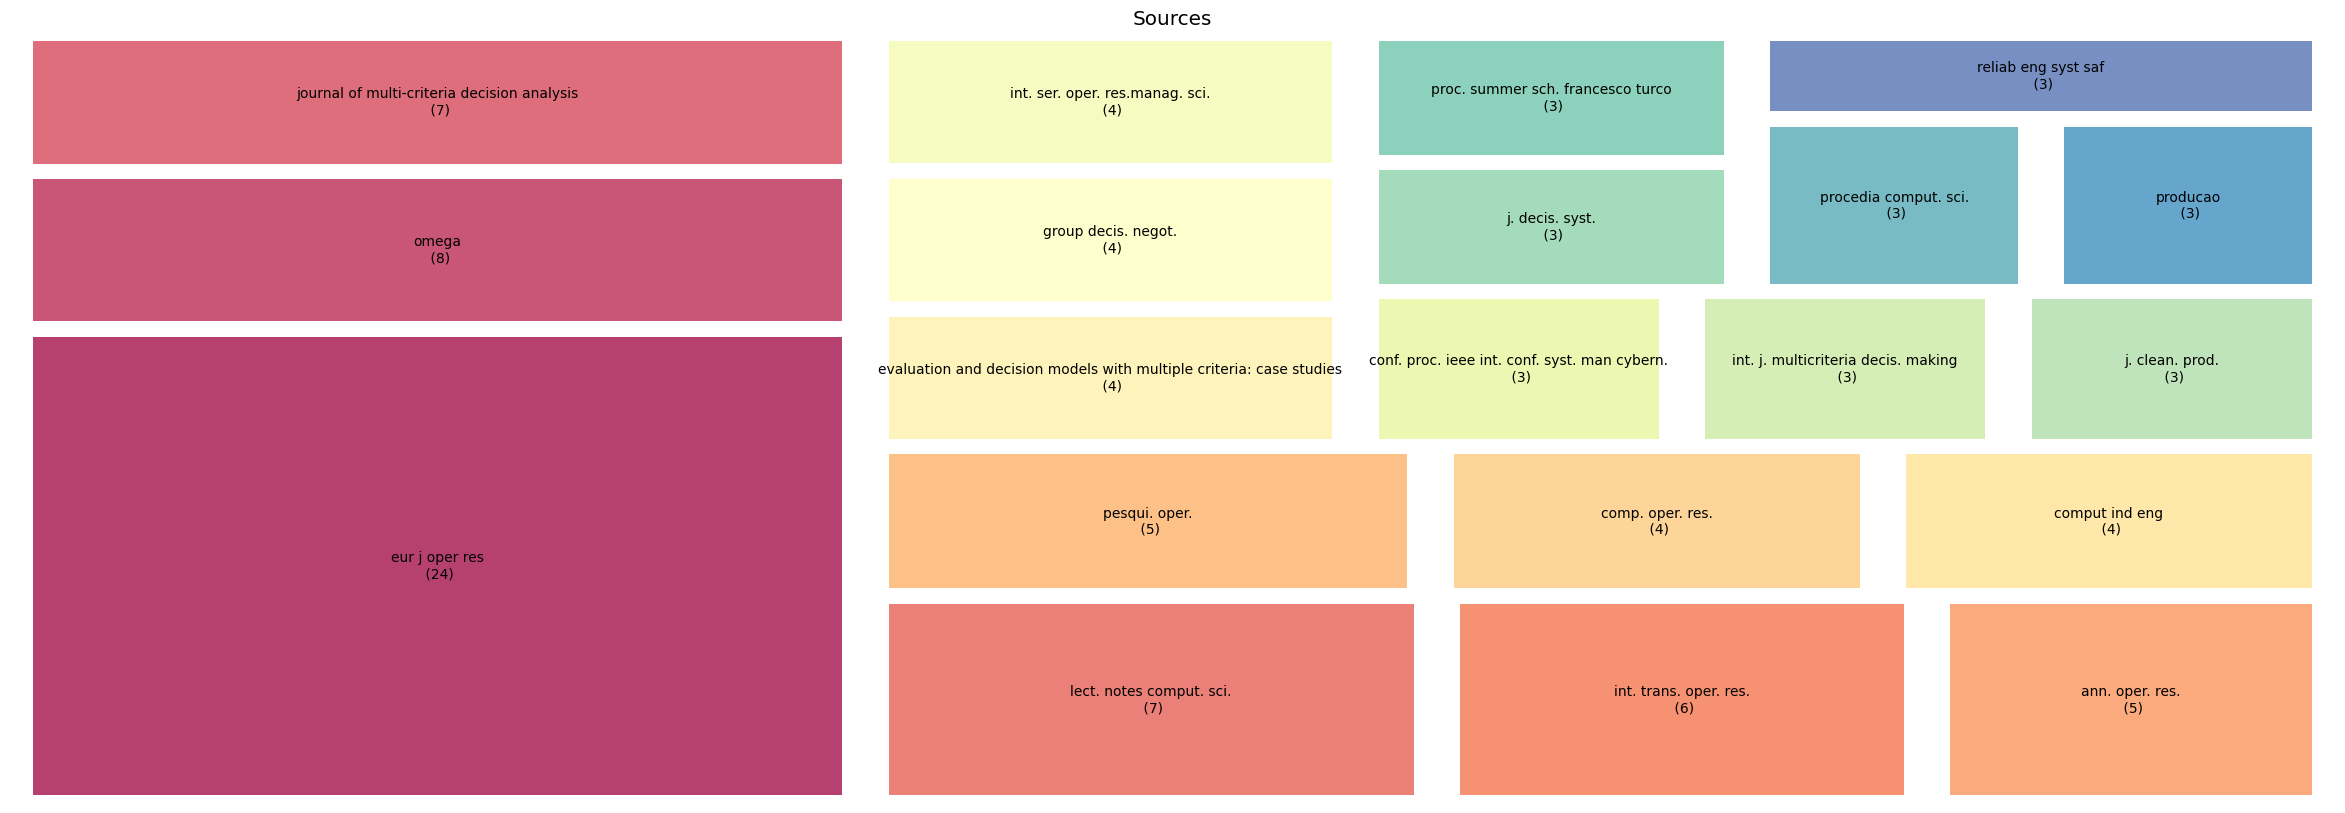

In [60]:
bibfile.tree_map(entry = 'jou', topn = 20, size_x = 30, size_y = 10)

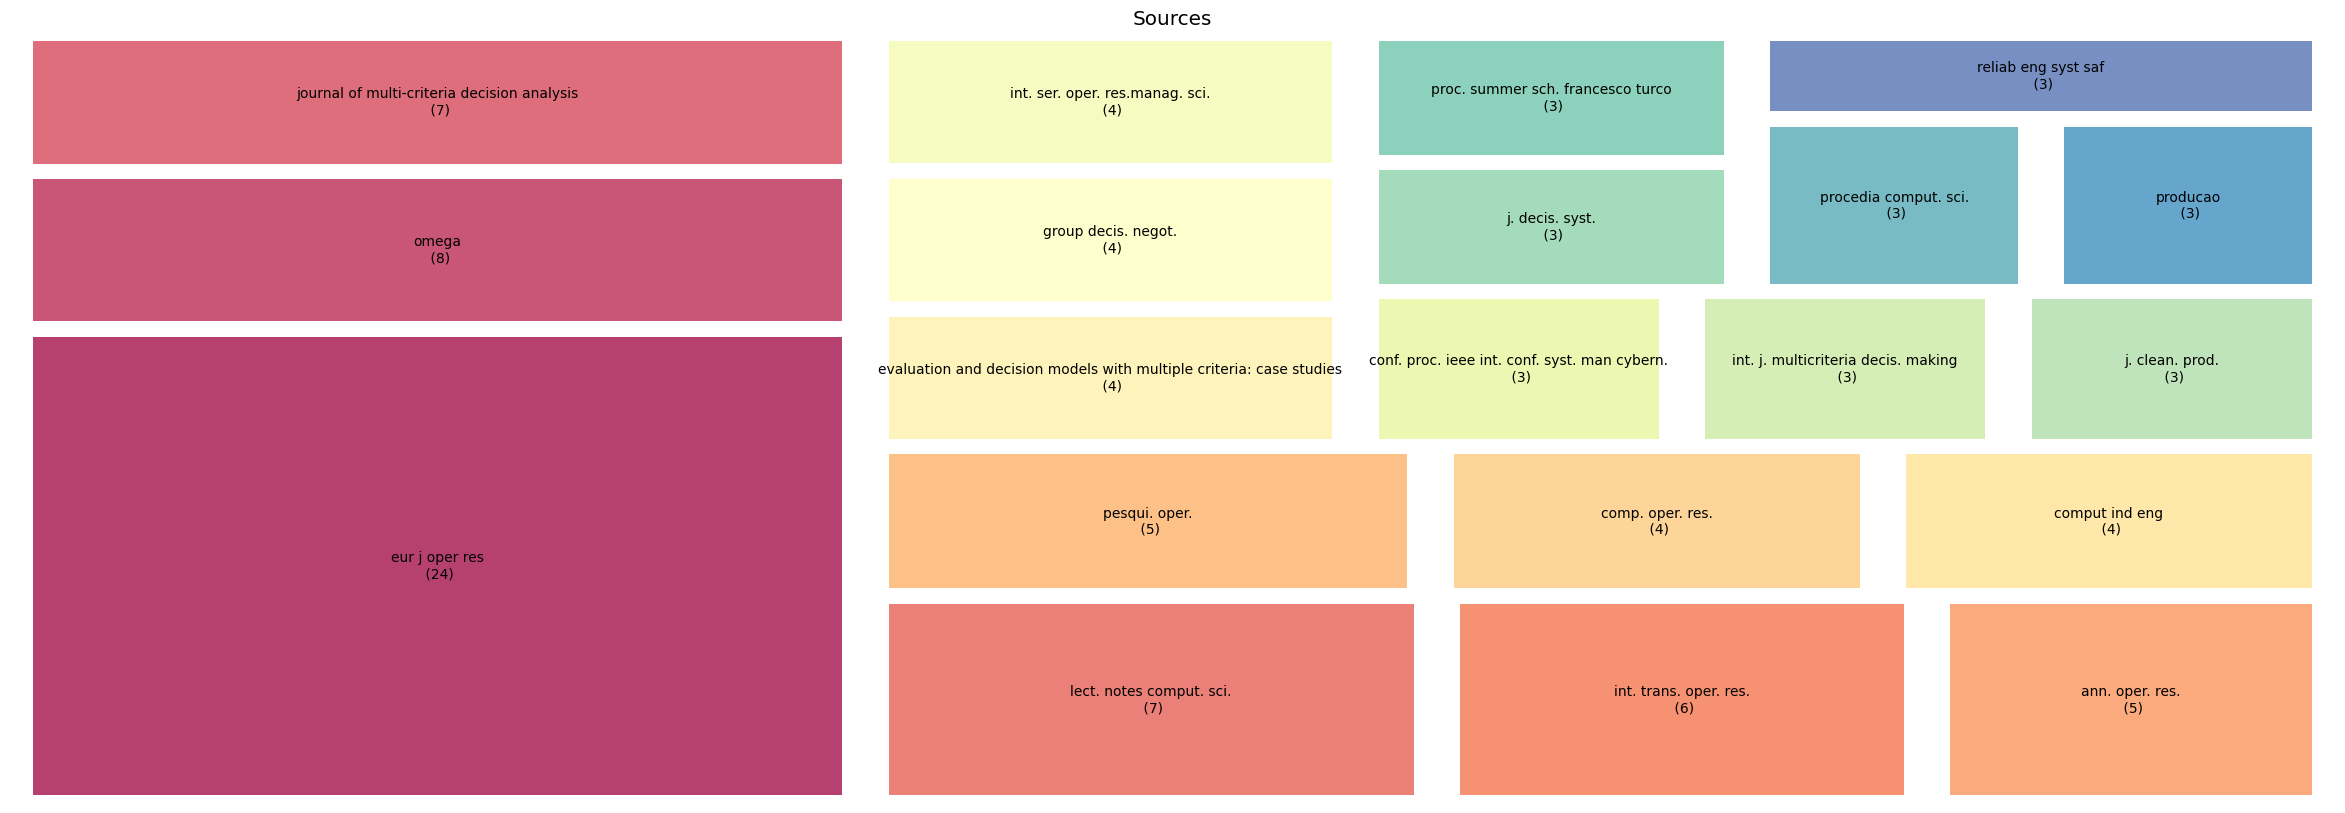

In [42]:
# Tree Map
# Arguments: entry = 'kwp', 'kwa', 'aut', 'jou', 'ctr', or 'inst';
#            topn  = Total number entities
bibfile.tree_map(entry = 'jou', topn = 20, size_x = 30, size_y = 10)

In [61]:
bibfile.authors_productivity(view = 'browser', topn = 20)

In [43]:
# Authors Productivity Plot (An interactive plot). It informs for each year the documents (IDs) published for each author
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn = Total number entities
bibfile.authors_productivity(view = 'notebook', topn = 20)

In [62]:
# View Table
data_ap = bibfile.ask_gpt_ap
data_ap

1998  1999  2000  2001  2002  2003  2004  2006  2007  2008  \
mousseau, v.       1.0   0.0   1.0   1.0   2.0   2.0   1.0   1.0   1.0   0.0   
figueira, j.r.     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
dias, l.c.         0.0   1.0   1.0   0.0   0.0   1.0   0.0   1.0   1.0   2.0   
antunes, c.h.      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
costa, h.g.        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
roy, b.            0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   
de almeida, a.t.   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
pirlot, m.         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
certa, a.          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
unknow             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
trojan, f.         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
oliveira, e.       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
carpitella, s.     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
cailloux, o.       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
navarro, j.        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
kadziński, m.      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
costa, a.s.        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
bouyssou, d.       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0   0.0   
zopounidis, c.     0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
tervonen, t.       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   

                  ...  2013  2014  2015  2016  2017  2018  2019  2020  2021  \
mousseau, v.      ...   1.0   1.0   1.0   0.0   0.0   1.0   1.0   0.0   0.0   
figueira, j.r.    ...   0.0   1.0   0.0   0.0   2.0   1.0   3.0   3.0   3.0   
dias, l.c.        ...   1.0   3.0   2.0   0.0   0.0   2.0   1.0   0.0   0.0   
antunes, c.h.     ...   3.0   0.0   1.0   0.0   1.0   1.0   0.0   0.0   0.0   
costa, h.g.       ...   0.0   1.0   2.0   0.0   0.0   1.0   1.0   1.0   1.0   
roy, b.           ...   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
de almeida, a.t.  ...   0.0   0.0   0.0   2.0   0.0   0.0   0.0   1.0   1.0   
pirlot, m.        ...   0.0   1.0   2.0   0.0   1.0   0.0   1.0   0.0   1.0   
certa, a.         ...   0.0   1.0   0.0   1.0   1.0   0.0   0.0   0.0   4.0   
unknow            ...   1.0   0.0   2.0   0.0   1.0   1.0   0.0   0.0   0.0   
trojan, f.        ...   0.0   0.0   0.0   0.0   0.0   1.0   2.0   1.0   1.0   
oliveira, e.      ...   3.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
carpitella, s.    ...   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   5.0   
cailloux, o.      ...   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
navarro, j.       ...   0.0   0.0   0.0   0.0   1.0   1.0   2.0   1.0   0.0   
kadziński, m.     ...   0.0   0.0   1.0   0.0   1.0   2.0   0.0   0.0   1.0   
costa, a.s.       ...   0.0   0.0   0.0   0.0   1.0   1.0   2.0   0.0   1.0   
bouyssou, d.      ...   0.0   0.0   2.0   0.0   0.0   0.0   0.0   0.0   1.0   
zopounidis, c.    ...   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
tervonen, t.      ...   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   

                  2022  
mousseau, v.       0.0  
figueira, j.r.     1.0  
dias, l.c.         0.0  
antunes, c.h.      0.0  
costa, h.g.        0.0  
roy, b.            1.0  
de almeida, a.t.   0.0  
pirlot, m.         0.0  
certa, a.          0.0  
unknow             0.0  
trojan, f.         0.0  
oliveira, e.       0.0  
carpitella, s.     0.0  
cailloux, o.       0.0  
navarro, j.        0.0  
kadziński, m.      0.0  
costa, a.s.        0.0  
bouyssou, d.       0.0  
zopounidis, c.     0.0  
tervonen, t.       0.0  

[20 rows x 24 columns]

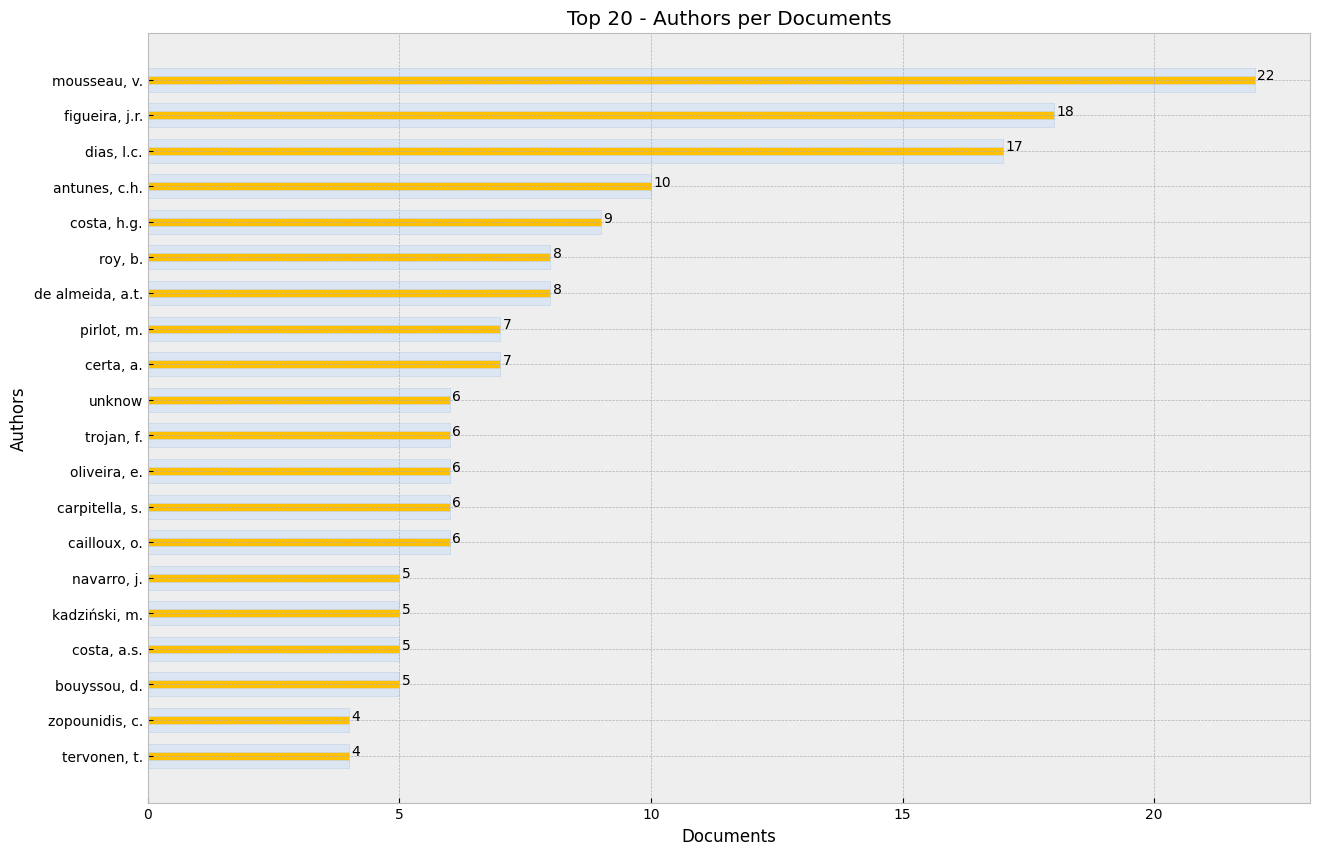

In [63]:
bibfile.plot_bars(statistic = 'apd', topn = 20, size_x = 15, size_y = 10)

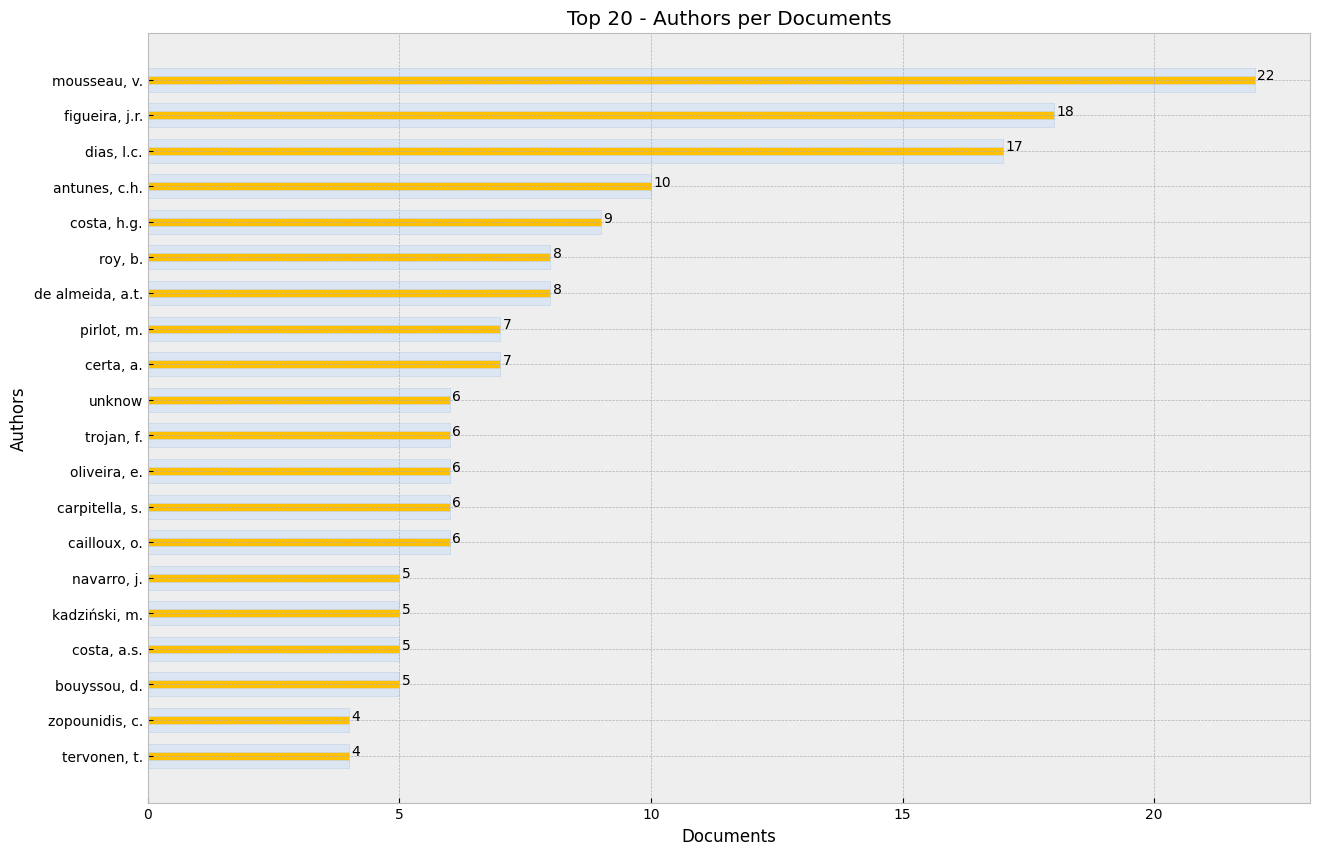

In [46]:
# Bar Plots
# Arguments: statistic = 'dpy', 'cpy', 'ppy', 'ltk', 'spd', 'spc', 'apd', 'apc', 'aph', 'bdf_1', 'bdf_2', 'bdf_3', 'ipd', 'ipc', 'cpd', 'cpc', 'lpd', 'kpd', 'kad'
#                        'dpy' = Documents per Year
#                         cpy' = Citations per Year
#                        'ppy' = Past Citations per Year
#                        'ltk' = Lotka's Law
#                        'spd' = Sources per Documents
#                        'spc' = Sources per Citations
#                        'apd' = Authors per Documents
#                        'apc' = Authors per Citations
#                        'aph' = Authors per H-Index
#                        'bdf_1', 'bdf_2', 'bdf_3' = Bradford's Law - Core Sources 1, 2 or 3
#                        'ipd' = Institutions per Documents
#                        'ipc' = Institutions per Citations
#                        'cpd' = Countries per Documents
#                        'cpc' = Countries per Citations
#                        'lpd' = Language per Documents
#                        'kpd' = Keywords Plus per Documents
#                        'kad' = Authors' Keywords per Documents
#            topn      = Total number entities
bibfile.plot_bars(statistic = 'apd', topn = 20, size_x = 15, size_y = 10)

In [64]:
# View Table
data_bp = bibfile.ask_gpt_bp
data_bp

Documents  Authors
0       mousseau, v.       22
1     figueira, j.r.       18
2         dias, l.c.       17
3      antunes, c.h.       10
4        costa, h.g.        9
5            roy, b.        8
6   de almeida, a.t.        8
7         pirlot, m.        7
8          certa, a.        7
9             unknow        6
10        trojan, f.        6
11      oliveira, e.        6
12    carpitella, s.        6
13      cailloux, o.        6
14       navarro, j.        5
15     kadziński, m.        5
16       costa, a.s.        5
17      bouyssou, d.        5
18    zopounidis, c.        4
19      tervonen, t.        4

## 网络可视化

In [65]:
bibfile.network_adj_dir(view = 'browser', min_count = 7, node_labels = True, local_nodes = False)

In [48]:
# Network - Citation Analisys Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have been cited at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            local_nodes = True or False (True -> Only the blue will be displayed, False -> Red and Blue nodes will be displayed)
bibfile.network_adj_dir(view = 'notebook', min_count = 7, node_labels = True, local_nodes = False)

In [66]:
# View Table
data_nad = bibfile.ask_gpt_nad
data_nad

Paper Cited Reference
0      0          r_6825
1      5          r_5689
2      5          r_5852
3      8          r_5689
4      8          r_6640
..   ...             ...
93   252          r_5605
94   252          r_6823
95   255          r_6823
96   256          r_6133
97   257          r_6640

[98 rows x 2 columns]

In [67]:
bibfile.find_nodes_dir(view = 'browser', article_ids = ['44', '235'], ref_ids = [])

In [50]:
# Network - Highlight Citation Analysis Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            article_ids = A list of Blue Nodes. It indicates the documents cited by them;
#            ref_ids     = A list of Red Nodes. It indicates the documents that cites them
bibfile.find_nodes_dir(view = 'notebook', article_ids = ['44', '235'], ref_ids = [])

In [69]:
bibfile.find_nodes_dir(view = 'browser', article_ids = [], ref_ids = ['r_5605'])

In [52]:
# Network - Highlight Citation Analysis Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            article_ids = A list of Blue Nodes. It indicates the documents cited by them;
#            ref_ids     = A list of Red Nodes. It indicates the documents that cites them
bibfile.find_nodes_dir(view = 'notebook', article_ids = [], ref_ids = ['r_5606'])

In [70]:
bibfile.network_hist(view = 'browser', min_count = 0, node_size = -1, node_labels = True, back = [], forward = [])

In [53]:
# Network - Local Documents (Only Blue Nodes) Citation History. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            back        = A list of documents. It shows the documents cited by them direct and indirectly;
#            forward     = A list of documents. It shows the documents that cites them direct and indirectly
bibfile.network_hist(view = 'notebook', min_count = 0, node_size = -1, node_labels = True, back = [], forward = [])

In [71]:
# View Table
data_hist = bibfile.ask_gpt_hist
data_hist

Paper ID (Year) References (Year)
0          1 (2022)         51 (2019)
1          1 (2022)         59 (2019)
2          3 (2021)          8 (2021)
3          3 (2021)         45 (2019)
4          3 (2021)          7 (2021)
..              ...               ...
142      220 (2009)        250 (2002)
143      223 (2008)        220 (2009)
145      231 (2007)        246 (2003)
146      237 (2006)        249 (2002)
148      237 (2006)        242 (2004)

[145 rows x 2 columns]

In [72]:
bibfile.network_hist(view = 'browser', min_count = 0, node_size = -1, node_labels = True, back = ['24'], forward = [])

In [55]:
# Network - Local Documents (Only Blue Nodes) Citation History. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            back        = A list of documents. It shows the documents cited by them direct and indirectly;
#            forward     = A list of documents. It shows the documents that cites them direct and indirectly
bibfile.network_hist(view = 'notebook', min_count = 0, node_size = -1, node_labels = True, back = ['24'], forward = [])

In [73]:
bibfile.network_hist(view = 'browser', min_count = 0, node_size = -1, node_labels = True, back = [], forward = ['97'])

In [56]:
# Network - Local Documents (Only Blue Nodes) Citation History. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            back        = A list of documents. It shows the documents cited by them direct and indirectly;
#            forward     = A list of documents. It shows the documents that cites them direct and indirectly
bibfile.network_hist(view = 'notebook', min_count = 0, node_size = -1, node_labels = True, back = [], forward = ['97'])

In [74]:
bibfile.network_adj(view = 'browser', adj_type = 'aut', min_count = 5, node_labels = True, label_type = 'name', centrality = None)

In [57]:
# Network - Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            adj_type    = 'aut', 'cout', 'inst', 'kwa', or 'kwp'
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            label_type  = 'id', 'name' (Only meaningfull if node_labels = True. 'id' -> The ID will be displayed; 'name' -> The name will be displayed);
#            centrality  = 'degree', 'load', 'betw', 'close', 'eigen', 'katz', 'harmonic', or None. Color nodes according to centrality criterion
#                          'degree'   = Degree Centrality
#                          'load'     = Load Centrality
#                          'betw'     = Betweenness Centrality
#                          'close'    = Closeness Centrality
#                          'eigen'    = Eigenvector Centrality
#                          'katz'     = Katz Centrality
#                          'harmonic' = Harmonic Centrality
#                           None      = The Community Algorithm, Girvan-Newman, will be used Instead of a Centrality Criterion
bibfile.network_adj(view = 'notebook', adj_type = 'aut', min_count = 5, node_labels = True, label_type = 'name', centrality = None)

# PS: If a centrality criterion is used then the values can be obtained by the following command:  bibfile.table_centr

In [75]:
# View Table
data_adj = bibfile.ask_gpt_adj
data_adj

Node 1 (Author) Node 2 (Author)  Node 1 Cluster  Node 2 Cluster
0           ID: a_7        ID: a_80             3.0             3.0
1          ID: a_14       ID: a_181             2.0             2.0
2          ID: a_16       ID: a_182             0.0             0.0
3          ID: a_18       ID: a_152             2.0             2.0
4          ID: a_22       ID: a_403             0.0             0.0
..              ...             ...             ...             ...
125       ID: a_367       ID: a_394             1.0             1.0
126       ID: a_375       ID: a_485             2.0             2.0
127       ID: a_403       ID: a_470             0.0             0.0
128       ID: a_404       ID: a_449             0.0             0.0
129       ID: a_449       ID: a_471             0.0             0.0

[130 rows x 4 columns]

In [76]:
bibfile.find_nodes(node_ids = [], node_name = ['figueira, j.r.'], node_only = False)

In [77]:
bibfile.find_nodes(node_ids = [], node_name = ['figueira, j.r.'], node_only = True)

In [59]:
# Network - Highlight  Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view      = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            node_ids  = A list of IDs. Only meaningfull if label_type = 'id';
#            node_name = A list of Names. Only meaningfull iflabel_type = 'name';
#            node_only = True or False (True -> Only the Node will be Highlighted, False -> Node and its Connections will be Highlighted)
bibfile.find_nodes(node_ids = [], node_name = ['figueira, j.r.'], node_only = False)

In [78]:
bibfile.network_sim(view = 'browser', sim_type = 'cocit', node_size = 10, node_labels = True, cut_coup = 0.3, cut_cocit = 5)

In [79]:
bibfile.network_sim(view = 'browser', sim_type = 'cocit', node_size = 10, node_labels = True, cut_coup = 1, cut_cocit = 5)

In [60]:
# Network - Similarity Analysis using coupling or cocitation methods. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            sim_type    = 'coup', 'cocit' ('coup' -> Coupling Method, 'cocit' -> Cocitation Method)
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            cut_coup    = Cutoff value for Coupling Method. Only meaninfull if sim_type = 'coup';
#            cut_cocit   = Cutoff value for Cocitation Method. Only meaninfull if sim_type = 'cocit'
bibfile.network_sim(view = 'notebook', sim_type = 'cocit', node_size = 10, node_labels = True, cut_coup = 0.3, cut_cocit = 5)

In [80]:
# Check Similarity Values
bibfile.sim_table

Pair Node  Sim(cocit)
0     (8,121)         5.0
1     (8,125)         5.0
2    (10,185)         5.0
3     (12,27)         5.0
4     (43,79)        12.0
5    (47,122)         5.0
6    (49,123)         9.0
7     (78,91)         7.0
8   (104,139)         6.0
9   (122,125)         6.0
10  (122,230)         5.0
11  (129,130)         6.0
12  (165,167)         5.0
13  (172,178)        12.0
14  (230,231)        22.0
15  (242,245)         5.0

## 国家合作网络

In [81]:
bibfile.network_adj_map(view = 'browser', connections = True, country_lst = [])

In [62]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = True, country_lst = [])

In [82]:
bibfile.network_adj_map(view = 'browser', connections = True, country_lst = ['France'])

In [83]:
# View Table
data_map = bibfile.ask_gpt_map
data_map

Country 1       Country 2
0          Iran  United Kingdom
1       Finland        Portugal
2       Lebanon          France
3        Serbia           Italy
4        Turkey          France
..          ...             ...
87       Greece  United Kingdom
88       Greece          France
89       Greece        Portugal
90      Denmark        Portugal
91  Switzerland          France

[92 rows x 2 columns]

In [84]:
bibfile.network_adj_map(view = 'browser', connections = False, country_lst = ['Mexico'])

In [64]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = False, country_lst = ['Mexico'])

## NLP

In [85]:
bibfile.create_embeddings(stop_words = ['en'], rmv_custom_words = [], corpus_type = 'abs')
emb = bibfile.embds

In [86]:
emb

array([[ 0.01732533,  0.01483713, -0.07609227, ...,  0.03527189,
         0.01298358,  0.10293075],
       [-0.01841865, -0.05547311,  0.0076943 , ...,  0.0083402 ,
         0.01913655,  0.08776967],
       [-0.00182596, -0.00381899, -0.04301083, ...,  0.01539893,
        -0.04008274, -0.0306939 ],
       ...,
       [ 0.03384543, -0.05365641,  0.00420131, ..., -0.04600778,
        -0.00012457,  0.05198557],
       [-0.00717988, -0.02232209, -0.02379085, ..., -0.00799747,
        -0.01107699,  0.07819378],
       [ 0.05315314,  0.02755752, -0.01822942, ...,  0.00675462,
        -0.02459758,  0.075877  ]], dtype=float32)

In [68]:
# NLP
# Arguments: corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
bibfile.create_embeddings(stop_words = ['en'], rmv_custom_words = [], corpus_type = 'abs')
emb = bibfile.embds

如果运行提示：TimeoutError: [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败
需要接入VPN

In [95]:
bibfile.topics_creation(stop_words = ['en'], rmv_custom_words = [], embeddings = False)

   Topic  Count                                 Name  \
0     -1    106     -1_decision_tri_criteria_electre   
1      0     53         0_electre_method_tri_sorting   
2      1     33     1_water_decision_system_criteria   
3      2     24  2_energy_vehicles_criteria_decision   
4      3     21   3_business_processes_model_process   
5      4     13      4_risk_risks_pipeline_suppliers   
6      5     11     5_mcda_decision_methods_software   

                                      Representation  \
0  [decision, tri, criteria, electre, method, bas...   
1  [electre, method, tri, sorting, categories, al...   
2  [water, decision, system, criteria, gis, elect...   
3  [energy, vehicles, criteria, decision, public,...   
4  [business, processes, model, process, decision...   
5  [risk, risks, pipeline, suppliers, management,...   
6  [mcda, decision, methods, software, conflict, ...   

                                 Representative_Docs  
0  [learning environments store huge amounts da

In [96]:
# Each document Topic
topics_embeddings_false = bibfile.topics

In [97]:
# Each document Probability to belong a Topic
probss_embeddings_false = bibfile.probs

In [98]:
bibfile.graph_topics_distribution(view = 'browser')

In [99]:
bibfile.topics_creation(stop_words = ['en'], rmv_custom_words = [], embeddings = True)

   Topic  Count                                 Name  \
0     -1    106     -1_tri_decision_criteria_electre   
1      0     53         0_electre_method_tri_sorting   
2      1     33     1_water_decision_system_criteria   
3      2     24  2_energy_vehicles_criteria_decision   
4      3     21   3_business_processes_model_process   
5      4     13      4_risk_risks_pipeline_suppliers   
6      5     11     5_mcda_decision_methods_software   

                                      Representation  \
0  [tri, decision, criteria, electre, method, bas...   
1  [electre, method, tri, sorting, categories, al...   
2  [water, decision, system, criteria, gis, elect...   
3  [energy, vehicles, criteria, decision, public,...   
4  [business, processes, model, process, decision...   
5  [risk, risks, pipeline, suppliers, management,...   
6  [mcda, decision, methods, software, conflict, ...   

                                 Representative_Docs  
0  [learning environments store huge amounts da

In [100]:
# Each document Topic
topics_embeddings_true = bibfile.topics

In [101]:
# Each document Probability to belong a Topic
probs_embeddings_true = bibfile.probs

In [102]:
bibfile.graph_topics_distribution(view = 'browser')

In [103]:
topics_embeddings_false == topics_embeddings_true

True

In [ ]:
#是不是需要重新运行应用后才有效？

In [69]:
# NLP #-1 refers to all outliers and should typically be ignored.
# Arguments: stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                              'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                              'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                              'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainianian;   'es' =  Spanish;  'sv' = Swedish
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            embeddings        = True or False. If True then word embeddings are used to create the topics
bibfile.topics_creation(stop_words = ['en'], rmv_custom_words = [], embeddings = False)

   Topic  Count                                 Name  \
0     -1    106     -1_decision_tri_criteria_electre   
1      0     53         0_electre_method_tri_sorting   
2      1     33     1_water_decision_system_criteria   
3      2     24  2_energy_vehicles_criteria_decision   
4      3     21   3_business_processes_model_process   
5      4     13      4_risk_risks_pipeline_suppliers   
6      5     11     5_mcda_decision_methods_software   

                                      Representation  \
0  [decision, tri, criteria, electre, method, bas...   
1  [electre, method, tri, sorting, categories, al...   
2  [water, decision, system, criteria, gis, elect...   
3  [energy, vehicles, criteria, decision, public,...   
4  [business, processes, model, process, decision...   
5  [risk, risks, pipeline, suppliers, management,...   
6  [mcda, decision, methods, software, conflict, ...   

                                 Representative_Docs  
0  [learning environments store huge amounts da

In [72]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_distribution(view = 'notebook')

In [104]:
bibfile.graph_topics(view='browser')

In [73]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics(view = 'notebook')

In [105]:
bibfile.graph_topics_projection(view='browser')

In [74]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_projection(v~iew = 'notebook')

In [106]:
bibfile.graph_topics_heatmap(view = 'browser')

In [75]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_heatmap(view = 'notebook')

In [107]:
# NLP
bibfile.topics_representatives()

Topic           Docs
0   -1.0               
1    0.0   260; 252; 12
2    1.0   141; 10; 185
3    2.0      9; 71; 28
4    3.0    18; 34; 117
5    4.0     112; 36; 2
6    5.0  142; 155; 188

In [108]:
# NLP
similar_topics, similarity = bibfile.topic_model.find_topics('electre', top_n = 10)
for i in range(0, len(similar_topics)):
    print('Topic: ', similar_topics[i], 'Correlation: ', round(similarity[i], 3))

Topic:  2 Correlation:  0.167
Topic:  0 Correlation:  0.164
Topic:  -1 Correlation:  0.143
Topic:  5 Correlation:  0.102
Topic:  3 Correlation:  0.101
Topic:  1 Correlation:  0.094
Topic:  4 Correlation:  0.073


In [109]:
# NLP
bibfile.topic_model.save('my_topic_model')
#loaded_topic_model = BERTopic.load('my_topic_model')

In [111]:
abs_summary = bibfile.summarize_abst_peg(article_ids = [218, 28, 212], model_name = 'google/pegasus-xsum')


Total Number of Valid Abstracts:  3



Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [79]:
# NLP - Abstractive Summarization
# Arguments: article_ids = A list of documents to perform an abstractive summarization with the available abstracts. If the list is empty then all documents will be used
#            model_name  = Available pre-trained models. Complete list is available at  https://huggingface.co/models?pipeline_tag=summarization&sort=downloads&search=pegasus
abs_summary = bibfile.summarize_abst_peg(article_ids = [218, 28, 212], model_name = 'google/pegasus-xsum')


Total Number of Valid Abstracts:  3



Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [112]:
# NLP - Check Abstractive Summarization
print(textwrap.fill(abs_summary, 150))

The present study proposes a multi-criteria decision aiding model, which includes the ELECTRE TRI-nC method, for supporting the public decision
process of sorting alternative energy retrofitting actions into various categories, each of them expresses different levels of overall performance.
The present study proposes a Multiple Criteria Decision Aiding model, which includes the ELECTRE TRI-nC method, for supporting the public decision
process of sorting alternative energy retrofitting actions into various categories, each of them expresses different levels of overall performance.


In [82]:
# NLP - Abstractive Summarization - chatGPT

# OBS 1: Requires the user to have an **API key** (https://platform.openai.com/account/api-keys))
# OBS 2: The limit of characters is 4097 per request

# Arguments: article_ids   = A list of documents to perform an abstractive summarization with the available abstracts. If the list is empty then all documents will be used
#            join_articles = If False then the abstracts will be analyzed separately. If True then the abstracts will be concate in a single text
#            api_key       = 'your_api_key_here'. Insert your personal API key (https://platform.openai.com/account/api-keys)
#            model         = Specifies the AI model used for text generation. The default value is "text-davinci-003"
#            query         = Ask chatGPT what you want to do with the abstracts. The default query is: 'from the following scientific abstracts, summarize the main information in a single paragraph using around 250 words'
abs_summary_chat = bibfile.summarize_abst_chatgpt(article_ids = [218, 28, 212], join_articles = True, api_key = 'sk-...Ue46', query = 'from the following scientific abstracts, summarize the main information in a single paragraph using around 250 words', model = 'gpt-4')

Document ID28 Number of Characters: 1364
Document ID212 Number of Characters: 1087
Document ID218 Number of Characters: 1078

Total Number of Valid Abstracts:  3



AuthenticationError: Incorrect API key provided: sk-...Ue46. You can find your API key at https://platform.openai.com/account/api-keys.

In [83]:
# NLP - Check Abstractive Summarization
print(textwrap.fill(abs_summary_chat, 250))

NameError: name 'abs_summary_chat' is not defined

In [84]:
# NLP - Extractive Summarization
# Arguments: article_ids = A list of documents to perform an extractive summarization with the available abstracts. If the list is empty then all documents will be used
ext_summary = bibfile.summarize_ext_bert(article_ids = [218, 28, 212])


Total Number of Valid Abstracts:  3



In [115]:
ext_summary = bibfile.summarize_ext_bert(article_ids = [218, 28, 212])


Total Number of Valid Abstracts:  3



In [116]:
# NLP - Check Extractive Summarization
print(textwrap.fill(ext_summary, 150))

The challenge of promoting sustainable cities and reaching the objectives developed by the European Green Deal includes the renovation of the building
sector, as it is responsible for 40% of energy consumption in Europe. The present study proposes a Multiple Criteria Decision Aiding model, which
includes the ELECTRE TRI-nC method, for supporting the public decision process of sorting alternative energy retrofitting actions into various
categories, each of them expresses different levels of overall performance. © 2020 Elsevier Ltd This paper performs an assessment of 41 agricultural
biogas plants located in Austria to determine their relative performance in terms of economic, environmental, and social criteria and corresponding
indicators. Under the Clean Development Mechanism (CDM), sustainable development is considered a country context-specific aspect which differs across
countries.


In [86]:
# Filter the .bib File
# Arguments: document = A list of documents to retain. The other documents will be deleted
#            doc_type = A list of doc types. Check the 'report' to select the available types;
#            year_str = An integer the determines the starting year of collection -1 = All years;
#            year_end = An integer the determines the ending year of collection   -1 = All years;
#            sources  = A list of sources. Check the cell '# Check Sources IDs' to select the available types;
#            core     = A integer (-1, 1, 2, 3, 12, or 23) -1 = All sources, 1 = Bradford core 1, 2 = Bradford core 2, 3 = Bradford core 3, 12 = Bradford core 1 and 2, 23 = Bradford core 2 and 3;
#            country  = A list of countries. Check the cell '# Check Countries IDs' to select the available types;
#            language = A list of languages. Check the 'report' to select the available types
#            abstract = True or False. True removes UNKNOW values from the abstract.
bibfile.filter_bib(documents = [], doc_type = [], year_str = -1, year_end = -1, sources = [], core = -1, country = [], language = [], abstract = False)

A Total of 261 Documents Remains

Article = 179
Article in Press = 1
Book Chapter = 12
Conference Paper = 64
Conference Review = 3
Review = 2


In [117]:
#获取全部数据
bibfile.filter_bib(documents = [], doc_type = [], year_str = -1, year_end = -1, sources = [], core = -1, country = [], language = [], abstract = False)

A Total of 261 Documents Remains

Article = 179
Article in Press = 1
Book Chapter = 12
Conference Paper = 64
Conference Review = 3
Review = 2


In [118]:
#获取2015-2020年文献数据
bibfile.filter_bib(documents = [], doc_type = [], year_str = 2015, year_end = 2020, sources = [], core = -1, country = [], language = [], abstract = False)

A Total of 111 Documents Remains

Article = 72
Article in Press = 1
Book Chapter = 9
Conference Paper = 27
Conference Review = 2


In [119]:
# Correct the .bib File
# Arguments: get         = A list of the current name(s);
#            replace_for = A string. This string will replace all matchs from the 'get' argument list
bibfile.merge_author(get = [], replace_for = 'name')
bibfile.merge_institution(get = [], replace_for = 'name')
bibfile.merge_country(get = [], replace_for = 'name')
bibfile.merge_language(get = [], replace_for = 'name')
bibfile.merge_source(get = [], replace_for = 'name')

In [88]:
bibfile

In [121]:
print(dir(bibfile))

['H', 'Xn', 'Xv', 'Yn', 'Yv', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_pbx_probe__adjacency_matrix_aut', '_pbx_probe__adjacency_matrix_ctr', '_pbx_probe__adjacency_matrix_inst', '_pbx_probe__adjacency_matrix_kwa', '_pbx_probe__adjacency_matrix_kwp', '_pbx_probe__adjacency_matrix_ref', '_pbx_probe__get_citations', '_pbx_probe__get_collaboration_year', '_pbx_probe__get_countries', '_pbx_probe__get_counts', '_pbx_probe__get_counts_year', '_pbx_probe__get_institutions', '_pbx_probe__get_past_citations_year', '_pbx_probe__get_ref_year', '_pbx_probe__get_str', '_pbx_probe__h_index', '_pbx_probe__hex_rgba', '_pbx_probe__id_author', '_pbx_probe__id_country', '_pbx_probe__id_document', '_pbx_pro